In [17]:
import itertools
from itertools import groupby

def fasta_iter(fasta_name):
    """
    given a fasta file. yield tuples of header, sequence
    """
    fh = open(fasta_name)
    # ditch the boolean (x[0]) and just keep the header or sequence since
    # we know they alternate.
    faiter = (x[1] for x in groupby(fh, lambda line: line[0] == ">"))
    for header in faiter:
        # drop the ">"
        header = header.next()[1:].strip()
        # join all sequence lines to one.
        seq = "".join(s.strip() for s in faiter.next())
        yield header, seq

fasta = fasta_iter('dna.fa')
labels = []
for ff in fasta:
    headerStr, seq = ff
    labels.append(headerStr)
Z = [[0 for x in range(4)] for y in range(309)] 

In [18]:
import numpy as np
score = np.loadtxt("out.txt")
score = np.delete(score, (311), axis=0)
score = np.delete(score, (311), axis=1)
print score
import pandas as pd
num_clusters = 0
dissimilarity_matrix = pd.DataFrame(score,index=labels, columns=labels)
print dissimilarity_matrix

[[   0.  238.  229. ...,  437.  228.  265.]
 [ 238.    0.  219. ...,  349.  246.  203.]
 [ 229.  219.    0. ...,  376.  236.  220.]
 ..., 
 [ 437.  349.  376. ...,    0.  452.  274.]
 [ 228.  246.  236. ...,  452.    0.  285.]
 [ 265.  203.  220. ...,  274.  285.    0.]]
            chr10_1000  chr10_125  chr10_1324  chr10_150  chr10_1503  \
chr10_1000         0.0      238.0       229.0      365.0       241.0   
chr10_125        238.0        0.0       219.0      278.0       198.0   
chr10_1324       229.0      219.0         0.0      308.0       213.0   
chr10_150        365.0      278.0       308.0        0.0       281.0   
chr10_1503       241.0      198.0       213.0      281.0         0.0   
chr10_1513       314.0      361.0       340.0      506.0       360.0   
chr10_1599       254.0      196.0       216.0      236.0       204.0   
chr10_1602       303.0      229.0       251.0      170.0       226.0   
chr10_1603      1297.0     1377.0      1347.0     1596.0      1379.0   
chr10_16

In [19]:
def interCluster(ele, element_list):
    max_diameter = -np.inf
    sumd = 0
    for i in element_list:
        sumd += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sumd/(len(element_list)-1)
    else: 
        avg = 0
    return avg
def distance(cluster1,cluster2):
    sumd = 0
    for i in cluster1:
        for j in cluster2:
            sumd += dissimilarity_matrix[i][j]
    avg = sumd/(len(cluster1)*len(cluster2))
    return avg
            
def intraCluster(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sumd = 0
    for j in splinter_list:
        sumd = sumd + dissimilarity_matrix[ele][j]
    avg = sumd/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinters):
    max_val = -np.inf
    max_index = None
    for ele in main_list:
        x = interCluster(ele, main_list)
        y = intraCluster(ele, main_list, splinters)
        diff= x -y
        if diff > max_val:
            max_val = diff
            max_index = ele
    if(max_val>0):
        return  (max_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinters = []    
    (maxIndex,flag) = splinter(main_list, splinters)
    while(flag > 0):
        main_list.remove(maxIndex)
        splinters.append(maxIndex)
        (maxIndex,flag) = splinter(element_list, splinters)
    
    return (main_list, splinters)

def max_diameter(cluster_list):
    cluster_index = None
    cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > cluster_value:
                    cluster_value = dissimilarity_matrix[i][j]
                    cluster_index = index
        
        index +=1
    
    if(cluster_value <= 0):
        return -1
    
    return cluster_index
    
def divisive(clusters):
    count = 0
    allClusters = {}
    clusterNumbers = {}
    invCluster = {}
    allClusters[count] = clusters
    clusterNumbers[count] = len(labels)
    count+=1
    
    index = 0
    while(index!=-1):  
        print(clusters)
        print
        (left, right) = split(clusters[index])
        del clusters[index]
        clusters.append(right)
        clusters.append(left)
        for every_list in clusters:
            temp = []
            flag = 1
            for every_element in every_list:
                temp.append(every_element)
            for key in allClusters:
                if allClusters[key]==temp:
                    flag = 0
            if flag==1:
                allClusters[count] = temp
                count+=1
        index = max_diameter(clusters)
    print(clusters)
    total = count
    for key in allClusters:
        invCluster[total-key-1] = allClusters[key]
        clusterNumbers[total-key-1] = len(allClusters[key])
    
    
    print 
    print invCluster
    print 
    print clusterNumbers
    it = 0
    key = 0
    while(key<=616):
        Z[it][0] = key
        Z[it][1] = key+1
        Z[it][2] = distance(invCluster[key],invCluster[key+1])
        Z[it][3] = clusterNumbers[key]+clusterNumbers[key+1]
        it+=1
        key+=2
    print Z
    


clusters = ([labels])
divisive(clusters)



[['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_150', 'chr10_1503', 'chr10_1513', 'chr10_1599', 'chr10_1602', 'chr10_1603', 'chr10_1684', 'chr10_1760', 'chr10_1762', 'chr10_1766', 'chr10_1771', 'chr10_1781', 'chr10_1786', 'chr10_1788', 'chr10_1801', 'chr10_1804', 'chr10_1818', 'chr10_1851', 'chr10_470', 'chr10_952', 'chr10_967', 'chr1_1014', 'chr11_1320', 'chr1_1154', 'chr1_1160', 'chr11_1719', 'chr1_1174', 'chr1_1185', 'chr11_1860', 'chr11_2025', 'chr1_1205', 'chr11_2097', 'chr1_1222', 'chr11_301', 'chr11_359', 'chr1_1406', 'chr11_413', 'chr11_417', 'chr1_1423', 'chr11_425', 'chr11_427', 'chr11_433', 'chr1_1437', 'chr1_1470', 'chr1_1500', 'chr1_1505', 'chr1_1536', 'chr1_1554', 'chr11_584', 'chr1_1659', 'chr1_1767', 'chr12_1132', 'chr1_214', 'chr12_1446', 'chr12_297', 'chr12_299', 'chr12_300', 'chr12_374', 'chr12_451', 'chr12_540', 'chr12_580', 'chr1_2862', 'chr1_3008', 'chr1_3016', 'chr1_3021', 'chr1_3049', 'chr1_3066', 'chr1_3072', 'chr1_3073', 'chr1_3132', 'chr13_148', 'chr1_3207'


[['chr11_1719'], ['chr2_1460', 'chr1_445', 'chr11_2025', 'chr16_894', 'chr5_479', 'chr5_998', 'chr19_157', 'chr4_560', 'chr2_2127'], ['chr8_1273', 'chr14_216', 'chr12_451', 'chr15_198', 'chr10_1603', 'chr10_1786', 'chr4_1746', 'chr18_515', 'chr16_426', 'chr9_599', 'chr6_258', 'chr5_1007', 'chr9_1291', 'chr3_1741', 'chr5_400', 'chr5_1095', 'chr18_746', 'chr5_1002', 'chr8_850', 'chr8_664', 'chr2_861', 'chr6_890', 'chr5_773', 'chr1_3446', 'chr2_2999', 'chr15_1118', 'chr5_976', 'chr5_1565', 'chr10_1851', 'chr8_1101', 'chr3_2174', 'chr5_1358', 'chr10_1762', 'chr1_943', 'chr1_3073', 'chr11_425', 'chr15_1301', 'chr15_51', 'chr4_1041', 'chr15_810', 'chr10_1801', 'chr3_578', 'chr13_580', 'chr3_114', 'chr2_1338', 'chr10_1818', 'chr8_435', 'chr2_2103', 'chr5_764', 'chr1_1222', 'chr9_737', 'chr12_1132', 'chr3_1051', 'chr14_1100', 'chr12_540', 'chr3_1823', 'chr1_1500', 'chr2_2323', 'chr11_2097', 'chr5_83', 'chr7_1475', 'chr10_1766', 'chr5_961', 'chr2_2311', 'chr7_1730', 'chr15_1262'], ['chr10_1000


[['chr11_1719'], ['chr8_1273', 'chr14_216', 'chr12_451', 'chr15_198', 'chr10_1603', 'chr10_1786', 'chr4_1746', 'chr18_515', 'chr16_426', 'chr9_599', 'chr6_258', 'chr5_1007', 'chr9_1291', 'chr3_1741', 'chr5_400', 'chr5_1095', 'chr18_746', 'chr5_1002', 'chr8_850', 'chr8_664', 'chr2_861', 'chr6_890', 'chr5_773', 'chr1_3446', 'chr2_2999', 'chr15_1118', 'chr5_976', 'chr5_1565', 'chr10_1851', 'chr8_1101', 'chr3_2174', 'chr5_1358', 'chr10_1762', 'chr1_943', 'chr1_3073', 'chr11_425', 'chr15_1301', 'chr15_51', 'chr4_1041', 'chr15_810', 'chr10_1801', 'chr3_578', 'chr13_580', 'chr3_114', 'chr2_1338', 'chr10_1818', 'chr8_435', 'chr2_2103', 'chr5_764', 'chr1_1222', 'chr9_737', 'chr12_1132', 'chr3_1051', 'chr14_1100', 'chr12_540', 'chr3_1823', 'chr1_1500', 'chr2_2323', 'chr11_2097', 'chr5_83', 'chr7_1475', 'chr10_1766', 'chr5_961', 'chr2_2311', 'chr7_1730', 'chr15_1262'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_150', 'chr10_1503', 'chr10_1513', 'chr10_1599', 'chr10_1602', 'chr10_1684', 'ch


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr5_479', 'chr5_998', 'chr19_157', 'chr4_560', 'chr2_2127'], ['chr2_1460'], ['chr1_445'], ['chr8_1273', 'chr14_216', 'chr12_451', 'chr15_198', 'chr10_1603', 'chr10_1786', 'chr4_1746', 'chr18_515', 'chr16_426', 'chr9_599', 'chr6_258'], ['chr5_1007', 'chr9_1291', 'chr3_1741', 'chr5_400', 'chr5_1095', 'chr18_746', 'chr5_1002', 'chr8_850', 'chr8_664', 'chr2_861', 'chr6_890', 'chr5_773', 'chr1_3446', 'chr2_2999', 'chr15_1118', 'chr5_976', 'chr5_1565', 'chr10_1851', 'chr8_1101', 'chr3_2174', 'chr5_1358', 'chr10_1762', 'chr1_943', 'chr1_3073', 'chr11_425', 'chr15_1301', 'chr15_51', 'chr4_1041', 'chr15_810', 'chr10_1801', 'chr3_578', 'chr13_580', 'chr3_114', 'chr2_1338', 'chr10_1818', 'chr8_435', 'chr2_2103', 'chr5_764', 'chr1_1222', 'chr9_737', 'chr12_1132', 'chr3_1051', 'chr14_1100', 'chr12_540', 'chr3_1823', 'chr1_1500', 'chr2_2323', 'chr11_2097', 'chr5_83', 'chr7_1475', 'chr10_1766', 'chr5_961', 'chr2_2311', 'chr7_1730', 'chr15_1262'], ['

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr8_1273', 'chr14_216', 'chr12_451', 'chr15_198', 'chr10_1603', 'chr10_1786', 'chr4_1746', 'chr18_515', 'chr16_426', 'chr9_599', 'chr6_258'], ['chr5_1007', 'chr9_1291', 'chr3_1741', 'chr5_400', 'chr5_1095', 'chr18_746', 'chr5_1002', 'chr8_850', 'chr8_664', 'chr2_861', 'chr6_890', 'chr5_773', 'chr1_3446', 'chr2_2999', 'chr15_1118', 'chr5_976', 'chr5_1565', 'chr10_1851', 'chr8_1101', 'chr3_2174', 'chr5_1358', 'chr10_1762', 'chr1_943', 'chr1_3073', 'chr11_425', 'chr15_1301', 'chr15_51', 'chr4_1041', 'chr15_810', 'chr10_1801', 'chr3_578', 'chr13_580', 'chr3_114', 'chr2_1338', 'chr10_1818', 'chr8_435', 'chr2_2103', 'chr5_764', 'chr1_1222', 'chr9_737', 'chr12_1132', 'chr3_1051', 'chr14_1100', 'chr12_540', 'chr3_1823', 'chr1_1500', 'chr2_2323', 'chr11_2097', 'chr5_83', 'chr7_1475', 'chr10_1766', 'chr5_961', 'chr2_2311', 'chr7_1730', 'chr15_1262'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722'

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722'

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722'

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722'


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722'

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr1_630', 'chr1_816', 'chr3_1250', 'chr5_1830', 'chr1_1659', 'chr20_249', 'chr10_1804', 'chr3_996', 'chr4_1404', 'chr2_1874', 'chr5_84', 'chr5_769', 'chr3_1913', 'chr11_1320', 'chr6_1741', 'chr4_551', 'chr6_928', 'chr2_1209', 'chr5_1828', 'chr5_49', 'chr9_723', 'chr3_904', 'chr2_666', 'chr1_3008', 'chr5_956', 'chr1_1174', 'chr18_374', 'chr10_1788', 'chr11_427', 'chr1_1185', 'chr15_575', 'chr20_246', 'chr2_770', 'chr1_1536', 'chr8_922', 'chr1_1154', 'chr1_3132', 'chr2_893', 'chr2_1870', 'chr1_1406', 'chr6_1767', 'chr4_861', 'chr5_1882', 'chr16_1298', 'chr3_332', 'chr13_932', 'chr2_49', 'chr8_918', 'chr19_733', 'chr14_349', 'chr14_218', 'chr10_1513', 'chr17_1395', 'chr15_494', 'chr4_447', 'chr5_779', 'chr20_681', 'chr3_2040', 'chr8_443', 'chr7_301', 'chr10_952', 'chr5_991', 'chr2_632', 'chr3_1909', 'chr8_1301', 'chr5_92', 'chr15_284', 'chr9_409', 'chr1_3066', 'chr15_1252', 'chr1_1205', 'chr12_300', 'chr2_722'

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr5_473', 'chr5_1729', 'chr11_413', 'chr5_76', 'chrX_220', 'chr5_997', 'chr7_1498', 'chr1_1470', 'chr6_1255', 'chr4_1672', 'chr6_1349', 'chr1_515', 'chr2_2101', 'chr10_1684', 'chr3_1253', 'chr8_1088', 'chr10_150', 'chr2_2125', 'chr12_1446', 'chr14_297', 'chr2_2248', 'chr5_1798', 'chr4_55', 'chr8_1109', 'chr12_580', 'chr3_1820', 'chr1_3207', 'chr2_857', 'chr19_725', 'chr1_1160', 'chr13_148', 'chr18_588', 'chr2_2280', 'chr11_433', 'chr19_768', 'chr4_1111', 'chr4_1439', 'chr15_563', 'chr7_1155', 'chr9_610', 'chr6_43', 'chr2_2247', 'chr10_967', 'chr15_322', 'chr1_3021', 'chr19_795', 'chr8_1099', 'chr2_671', 'chr10_1602', 'chr1_1767', 'chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr5_473', 'chr5_1729', 'chr11_413', 'chr5_76', 'chrX_220', 'chr5_997', 'chr7_1498', 'chr1_1470', 'chr6_1255', 'chr4_1672', 'chr6_1349', 'chr1_515', 'chr2_2101', 'chr10_1684', 'chr3_1253', 'chr8_1088', 'chr10_150', 'chr2_2125', 'chr12_1446', 'chr14_297', 'chr2_2248', 'chr5_1798', 'chr4_55', 'chr8_1109', 'chr12_580', 'chr3_1820', 'chr1_3207', 'chr2_857', 'chr19_725', 'chr1_1160', 'chr13_148', 'chr18_588', 'chr2_2280', 'chr11_433', 'chr19_768', 'chr4_1111', 'chr4_1439', 'chr15_563', 'chr7_1155', 'chr9_610', 'chr6_43', 'chr2_2247', 'chr10_967', 'chr15_322', 'chr1_3021', 'chr19_795', 'chr8_1099', 'chr2_671', 'chr10_1602', 'chr1_1767', 'chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr5_473', 'chr5_1729', 'chr11_413', 'chr5_76', 'chrX_220', 'chr5_997', 'chr7_1498', 'chr1_1470', 'chr6_1255', 'chr4_1672', 'chr6_1349', 'chr1_515', 'chr2_2101', 'chr10_1684', 'chr3_1253', 'chr8_1088', 'chr10_150', 'chr2_2125', 'chr12_1446', 'chr14_297', 'chr2_2248', 'chr5_1798', 'chr4_55', 'chr8_1109', 'chr12_580', 'chr3_1820', 'chr1_3207', 'chr2_857', 'chr19_725', 'chr1_1160', 'chr13_148', 'chr18_588', 'chr2_2280', 'chr11_433', 'chr19_768', 'chr4_1111', 'chr4_1439', 'chr15_563', 'chr7_1155', 'chr9_610', 'chr6_43', 'chr2_2247', 'chr10_967', 'chr15_322', 'chr1_3021', 'chr19_795', 'chr8_1099', 'chr2_671', 'chr10_1602', 'chr1_1767', 'chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr5_473', 'chr5_1729', 'chr11_413', 'chr5_76', 'chrX_220', 'chr5_997', 'chr7_1498', 'chr1_1470', 'chr6_1255', 'chr4_1672', 'chr6_1349', 'chr1_515', 'chr2_2101', 'chr10_1684', 'chr3_1253', 'chr8_1088', 'chr10_150', 'chr2_2125', 'chr12_1446', 'chr14_297', 'chr2_2248', 'chr5_1798', 'chr4_55', 'chr8_1109', 'chr12_580', 'chr3_1820', 'chr1_3207', 'chr2_857', 'chr19_725', 'chr1_1160', 'chr13_148', 'chr18_588', 'chr2_2280', 'chr11_433', 'chr19_768', 'chr4_1111', 'chr4_1439', 'chr15_563', 'chr7_1155', 'chr9_610', 'chr6_43', 'chr2_2247', 'chr10_967', 'chr15_322', 'chr1_3021', 'chr19_795', 'chr8_1099', 'chr2_671', 'chr10_1602', 'chr1_1767', 'chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr5_473', 'chr5_1729', 'chr11_413', 'chr5_76', 'chrX_220', 'chr5_997', 'chr7_1498', 'chr1_1470', 'chr6_1255', 'chr4_1672', 'chr6_1349', 'chr1_515', 'chr2_2101', 'chr10_1684', 'chr3_1253', 'chr8_1088', 'chr10_150', 'chr2_2125', 'chr12_1446', 'chr14_297', 'chr2_2248', 'chr5_1798', 'chr4_55', 'chr8_1109', 'chr12_580', 'chr3_1820', 'chr1_3207', 'chr2_857', 'chr19_725', 'chr1_1160', 'chr13_148', 'chr18_588', 'chr2_2280', 'chr11_433', 'chr19_768', 'chr4_1111', 'chr4_1439', 'chr15_563', 'chr7_1155', 'chr9_610', 'chr6_43', 'chr2_2247', 'chr10_967', 'chr15_322', 'chr1_3021', 'chr19_795', 'chr8_1099', 'chr2_671', 'chr10_1602', 'chr1_1767', 'chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290',

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290',

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1000', 'chr10_125', 'chr10_1324', 'chr10_1503', 'chr10_1760', 'chr10_1771', 'chr10_1781', 'chr10_470', 'chr1_1014', 'chr11_301', 'chr11_359', 'chr11_417', 'chr1_1423', 'chr1_1437', 'chr1_1505', 'chr1_1554', 'chr11_584', 'chr12_297', 'chr12_374', 'chr1_3049', 'chr1_3072', 'chr14_1101', 'chr14_1153', 'chr14_210', 'chr14_263', 'chr14_269', 'chr14_301', 'chr14_312', 'chr15_1267', 'chr15_1318', 'chr15_292', 'chr15_52', 'chr16_1207', 'chr16_256', 'chr16_513', 'chr16_533', 'chr16_564', 'chr18_248', 'chr18_255', 'chr18_262', 'chr18_345', 'chr18_888', 'chr18_916', 'chr19_755', 'chr2_1333', 'chr2_1370', 'chr21_38', 'chr2_2094', 'chr22_143', 'chr22_285', 'chr22_315', 'chr2_504', 'chr3_235', 'chr3_901', 'chr4_1103', 'chr4_1642', 'chr4_1682', 'chr4_290', 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'c

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'c

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'c

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr1_214', 'chr12_299', 'chr5_1731', 'chr1_2862', 'chr14_268', 'chr2_2270', 'chr18_236', 'chr17_1206', 'chr1_67', 'chr2_1888', 'chr5_1267', 'chr2_2100', 'chr2_1858', 'chr6_270', 'chr3_775', 'ch


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], 


[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], 

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [

[['chr11_1719'], ['chr11_2025'], ['chr16_894'], ['chr2_1460'], ['chr1_445'], ['chr5_479'], ['chr19_157'], ['chr5_998'], ['chr4_560'], ['chr2_2127'], ['chr10_1603'], ['chr8_1273'], ['chr14_216'], ['chr12_451'], ['chr15_198'], ['chr18_515'], ['chr10_1786'], ['chr4_1746'], ['chr6_258'], ['chr5_1007'], ['chr16_426'], ['chr9_599'], ['chr3_1741'], ['chr9_1291'], ['chr5_400'], ['chr5_1095'], ['chr8_664'], ['chr8_850'], ['chr18_746'], ['chr2_2999'], ['chr5_1002'], ['chr1_3446'], ['chr2_861'], ['chr5_976'], ['chr15_1118'], ['chr5_773'], ['chr6_890'], ['chr3_2174'], ['chr8_1101'], ['chr5_1358'], ['chr5_1565'], ['chr1_943'], ['chr10_1851'], ['chr10_1762'], ['chr1_3073'], ['chr11_425'], ['chr15_1301'], ['chr10_1818'], ['chr4_1041'], ['chr3_114'], ['chr10_1801'], ['chr12_1132'], ['chr15_51'], ['chr3_578'], ['chr15_810'], ['chr13_580'], ['chr2_1338'], ['chr8_435'], ['chr14_1100'], ['chr3_1823'], ['chr12_540'], ['chr3_1051'], ['chr5_764'], ['chr1_1222'], ['chr2_2103'], ['chr9_737'], ['chr10_1766'], [


{0: 2, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 1, 9: 1, 10: 2, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 4, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2, 23: 1, 24: 1, 25: 1, 26: 2, 27: 2, 28: 1, 29: 1, 30: 4, 31: 2, 32: 2, 33: 2, 34: 1, 35: 1, 36: 1, 37: 1, 38: 4, 39: 1, 40: 5, 41: 3, 42: 1, 43: 1, 44: 6, 45: 1, 46: 3, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 2, 59: 1, 60: 7, 61: 4, 62: 11, 63: 2, 64: 2, 65: 2, 66: 1, 67: 1, 68: 2, 69: 2, 70: 13, 71: 5, 72: 1, 73: 1, 74: 2, 75: 1, 76: 1, 77: 1, 78: 2, 79: 1, 80: 3, 81: 4, 82: 7, 83: 2, 84: 1, 85: 1, 86: 1, 87: 1, 88: 4, 89: 2, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 2, 101: 3, 102: 9, 103: 3, 104: 6, 105: 12, 106: 2, 107: 1, 108: 2, 109: 2, 110: 2, 111: 2, 112: 1, 113: 1, 114: 3, 115: 1, 116: 4, 117: 2, 118: 18, 119: 5, 120: 1, 121: 1, 122: 2, 123: 1, 124: 4, 125: 4, 126: 1, 127: 1, 128: 6, 129: 2, 130: 8, 131: 1, 132: 2, 133: 1, 134: 8, 135: 1, 136: 8, 137: 9, 

In [20]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
plt.figure()
import numpy 
n= numpy.array(Z)
n = n.astype(numpy.double)
print n
fig=plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')

[[  0.00000000e+00   1.00000000e+00   5.90000000e+01   3.00000000e+00]
 [  2.00000000e+00   3.00000000e+00   8.80000000e+01   2.00000000e+00]
 [  4.00000000e+00   5.00000000e+00   9.00000000e+01   2.00000000e+00]
 ..., 
 [  6.12000000e+02   6.13000000e+02   8.65654288e+02   3.01000000e+02]
 [  6.14000000e+02   6.15000000e+02   2.41644444e+03   1.00000000e+01]
 [  6.16000000e+02   6.17000000e+02   2.24804884e+03   3.11000000e+02]]


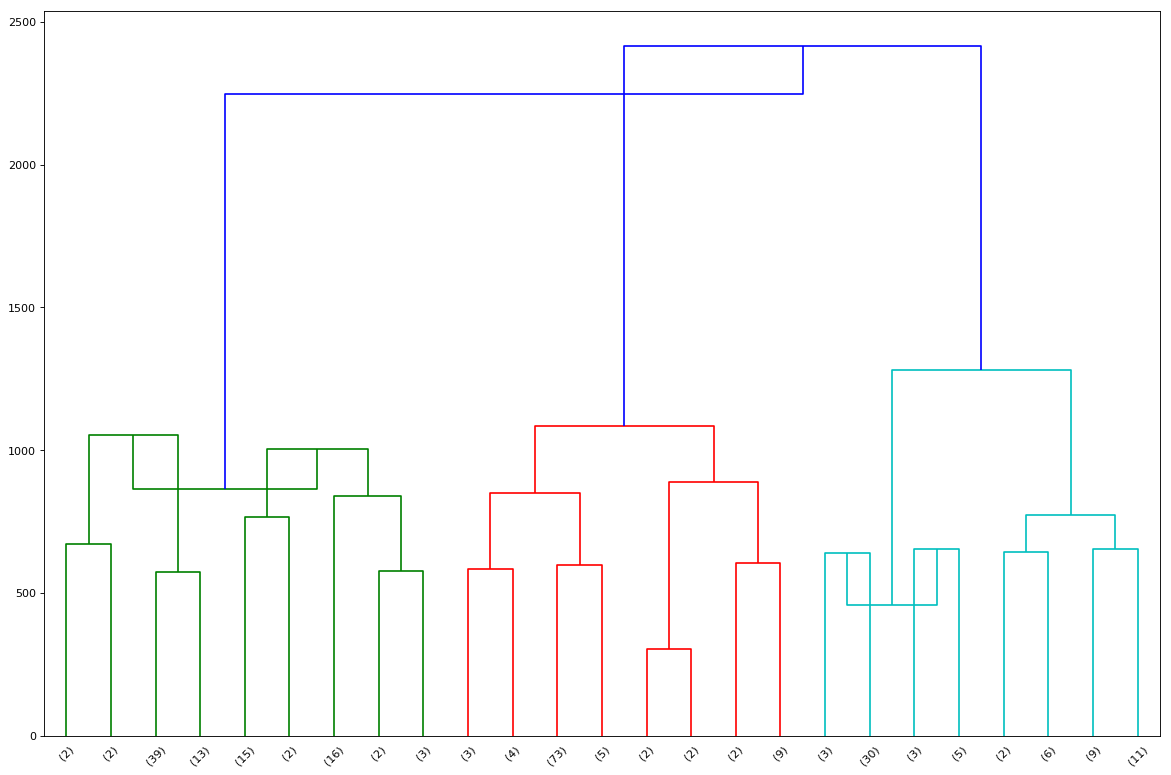

In [21]:
dn = hierarchy.dendrogram(n,p=25,truncate_mode='lastp')
plt.show()

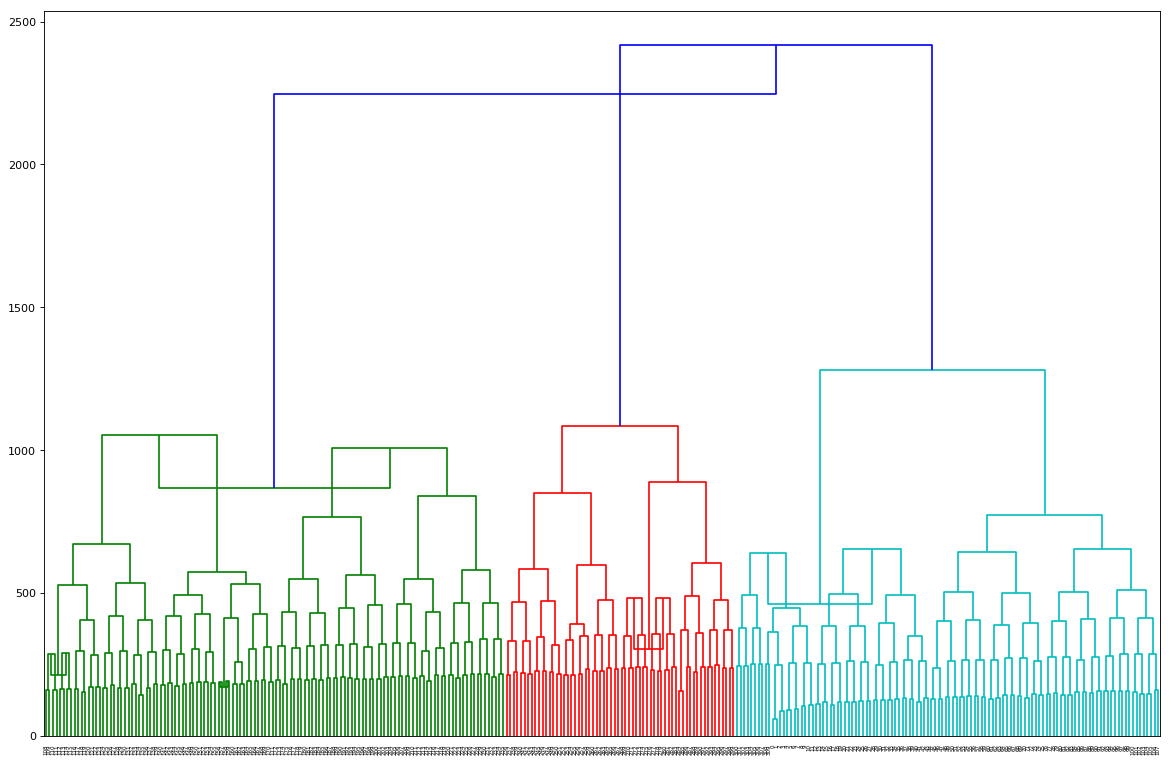

In [22]:
fig=plt.figure(figsize=(18, 12), dpi= 80, facecolor='w', edgecolor='k')
dn = hierarchy.dendrogram(n)
plt.show()